In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

# **Data Overview**
### There are in total 11 datasets from LoMo, in csv.
1. lomo_customers_dataset.csv
2. lomo_sellers_dataset.csv
3. lomo_geolocation_dataset.csv
4. lomo_products_dataset.csv
5. lomo_product_category_name_translation.csv
6. lomo_orders_dataset.csv
7. lomo_order_items_dataset.csv
8. lomo_order_payments_dataset.csv
9. lomo_order_reviews_dataset.csv
10. lomo_marketing_qualified_leads_dataset.csv
11. lomo_closed_deals_dataset.csv

In [2]:
# Setting the dir
os.chdir('C:\\Users\\tyeck\\OneDrive\\Desktop\\School\\Internship\\data-analytics-case-study-dataset') 
# Load the datasets
customers_df = pd.read_csv('001_lomo_customers_dataset.csv')
sellers_df = pd.read_csv('002_lomo_sellers_dataset.csv')
geolocation_df = pd.read_csv('003_lomo_geolocation_dataset.csv')
products_df = pd.read_csv('004_lomo_products_dataset.csv')
product_category_translation_df = pd.read_csv('005_lomo_product_category_name_translation.csv')
orders_df = pd.read_csv('006_lomo_orders_dataset.csv')
order_items_df = pd.read_csv('007_lomo_order_items_dataset.csv')
order_payments_df = pd.read_csv('008_lomo_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('009_lomo_order_reviews_dataset.csv')
marketing_qualified_leads_df = pd.read_csv('010_lomo_marketing_qualified_leads_dataset.csv')
closed_deals_df = pd.read_csv('011_lomo_closed_deals_dataset.csv')

In [3]:
# Helper function to return df summary 
from scipy import stats 
def dfsummary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

# **Problem Statement**
### **CMO challenge: Sales performance and prediction**
1. Which product category has the best performance and which has the highest potential? 


2. If you were the Chief Marketing Officer, how would you prioritise your (2C) marketing efforts? Would your strategy differ by region (state)? (Visualising your points on a map would help)

## **Data Preparation**
I will first do a preliminary exploration of the data before doing data cleaning and preparation for dashboard purposes later on.


In [4]:
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


### Product Category - Portuguese 
It is noted that the product category names are in Portuguese, which will require the translation to English, using the data from lomo_product_category_name_translation.csv 

In [5]:
products_df = products_df.merge(product_category_translation_df, 
                                left_on='product_category_name', 
                                right_on='product_category_name_portugese',
                                how='left')
dfsummary(products_df)

Dataset Shape: (32340, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,product_id,object,0,32340,1e9e8ef04dbcff4541ed26657ea517e5,3aa071139cb16b67ca9e5dea641aaa2f,96bd76ec8810374ed1b65e291975717f,14.98
1,product_category_name,object,0,73,perfumaria,artes,esporte_lazer,4.80
2,product_name_lenght,int64,0,66,40,44,46,5.09
3,product_description_lenght,int64,0,2960,287,276,250,10.72
4,product_photos_qty,int64,0,19,1,1,1,2.16
5,product_weight_g,int64,0,2202,225,1000,154,7.57
6,product_length_cm,int64,0,99,16,30,18,5.07
7,product_height_cm,int64,0,102,10,18,9,5.15
8,product_width_cm,int64,0,95,14,20,15,4.86
9,product_category_name_portugese,object,13,71,perfumaria,artes,esporte_lazer,4.80


### Product Category - Missing Translation
It is noted that there are missing product category names translations in English, where we will then do a manual override to the correct english translation.

In [6]:
products_df[products_df['product_category_name_english'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_portugese,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59,621,4,2839,19,16,18,NaN,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52,280,1,1200,25,33,25,NaN,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58,284,1,1200,25,33,25,NaN,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60,1532,3,650,16,22,20,NaN,NaN
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54,382,2,850,30,21,22,NaN,NaN
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46,280,1,1200,25,33,25,NaN,NaN
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59,927,1,10600,40,20,38,NaN,NaN
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58,792,4,750,30,30,30,NaN,NaN
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60,840,6,800,18,22,22,NaN,NaN
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52,1372,5,7350,40,30,23,NaN,NaN


The product category names that do not have an english translation are: ***'pc_gamer'*** and ***'portateis_cozinha_e_preparadores_de_alimentos'***. 

***'pc_gamer'*** can remain as is, while ***'portateis_cozinha_e_preparadores_de_alimentos'*** is actually ***'portable_kitchen_and_food_preparation'***.

In [7]:
# To update 'product_category_name_english' in the 'products_df' DataFrame
products_df.loc[products_df['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
products_df.loc[products_df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_preparation'

dfsummary(products_df)

Dataset Shape: (32340, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,product_id,object,0,32340,1e9e8ef04dbcff4541ed26657ea517e5,3aa071139cb16b67ca9e5dea641aaa2f,96bd76ec8810374ed1b65e291975717f,14.98
1,product_category_name,object,0,73,perfumaria,artes,esporte_lazer,4.80
2,product_name_lenght,int64,0,66,40,44,46,5.09
3,product_description_lenght,int64,0,2960,287,276,250,10.72
4,product_photos_qty,int64,0,19,1,1,1,2.16
5,product_weight_g,int64,0,2202,225,1000,154,7.57
6,product_length_cm,int64,0,99,16,30,18,5.07
7,product_height_cm,int64,0,102,10,18,9,5.15
8,product_width_cm,int64,0,95,14,20,15,4.86
9,product_category_name_portugese,object,13,71,perfumaria,artes,esporte_lazer,4.80


In [8]:
# Do not need multiple category names fields, so we will drop the rest.
# Drop 'product_category_name' and 'product_category_name_portugese' columns from the DataFrame
products_df = products_df.drop(['product_category_name', 'product_category_name_portugese'], axis=1)

## Merge Related DataFrames to evaluate performance and potential.
The DFs to be merged are:
1. order_items_df
2. products_df
3. orders_df

In [9]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


### Merging of orders_items and products_df
to ensure that every item ordered is categorised into product categories.

In [10]:
# Merge datasets to get a full picture of the product performance on sales and volume
LoMoDF = (order_items_df.merge(products_df, on='product_id',how ="left"))

dfsummary(LoMoDF)

Dataset Shape: (112650, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,98666,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,16.49
1,order_item_id,int64,0,21,1,1,1,0.72
2,product_id,object,0,32951,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f,c777355d18b72b67abbeef9df44fd0fd,13.63
3,seller_id,object,0,3095,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36,5b51032eddd242adc84c38acab88f23d,9.48
4,shipping_limit_date,object,0,54615,19/09/2017 09:45,03/05/2017 11:05,18/01/2018 14:48,15.28
5,price,float64,0,5968,58.9,239.9,199.0,9.58
6,freight_value,float64,0,6999,13.29,19.93,17.87,10.51
7,product_name_lenght,float64,1604,66,58.0,56.0,59.0,5.03
8,product_description_lenght,float64,1604,2960,598.0,239.0,695.0,10.44
9,product_photos_qty,float64,1604,19,4.0,2.0,2.0,2.17


### Missing Product Categorisation and details.
There are 1604 products that do not have categorisation. Noting that these products accounts for about 4.86% (1604/32951) of the total products, we will drop these records.

Additionally, since the product physical details such as the photos, weight and length will not be as useful in the current analysis, I will be dropping these fields as well.

In [11]:
# Dropping columns that are not used in this analysis.
LoMoDF = LoMoDF.drop(['product_name_lenght', 'product_description_lenght',
                      'product_photos_qty','product_weight_g','product_length_cm',
                      'product_height_cm','product_width_cm'], axis=1)
# Dropping records that do not have a product category, since it would not be useful for the analysis.
LoMoDF = LoMoDF.dropna(subset=['product_category_name_english'])

dfsummary(LoMoDF)

Dataset Shape: (111046, 8)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,97276,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,16.47
1,order_item_id,int64,0,21,1,1,1,0.72
2,product_id,object,0,32340,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f,c777355d18b72b67abbeef9df44fd0fd,13.61
3,seller_id,object,0,3035,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36,5b51032eddd242adc84c38acab88f23d,9.45
4,shipping_limit_date,object,0,54106,19/09/2017 09:45,03/05/2017 11:05,18/01/2018 14:48,15.27
5,price,float64,0,5901,58.9,239.9,199.0,9.57
6,freight_value,float64,0,6977,13.29,19.93,17.87,10.51
7,product_category_name_english,object,0,73,cool_stuff,pet_shop,furniture_decor,4.72


### Merging of orders_df
to ensure that every item ordered has the related purchase timestamp and order status.

In [12]:
# Merge dataset orders_df to get a full picture of the product performance on sales and volume
LoMoDF = (LoMoDF.merge(orders_df, on='order_id',how ="left"))

dfsummary(LoMoDF)

Dataset Shape: (111046, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,97276,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,16.47
1,order_item_id,int64,0,21,1,1,1,0.72
2,product_id,object,0,32340,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f,c777355d18b72b67abbeef9df44fd0fd,13.61
3,seller_id,object,0,3035,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36,5b51032eddd242adc84c38acab88f23d,9.45
4,shipping_limit_date,object,0,54106,19/09/2017 09:45,03/05/2017 11:05,18/01/2018 14:48,15.27
5,price,float64,0,5901,58.9,239.9,199.0,9.57
6,freight_value,float64,0,6977,13.29,19.93,17.87,10.51
7,product_category_name_english,object,0,73,cool_stuff,pet_shop,furniture_decor,4.72
8,customer_id,object,0,97276,3ce436f183e68e07877b285a838db11a,f6dd3ec061db4e3987629fe6b26e5cce,6489ae5e4333f3693df5ad4372dab6d3,16.47
9,order_status,object,0,7,delivered,delivered,delivered,0.19


### Data Cleaning for Orders_df
There are orders that ends up being 'canceled' and hence, should be removed from the df.

In [13]:
sum(LoMoDF['order_status'] == 'canceled')

528

In [14]:
LoMoDF = LoMoDF[LoMoDF['order_status'] != 'canceled']

dfsummary(LoMoDF)

Dataset Shape: (110518, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,96829,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,16.46
1,order_item_id,int64,0,21,1,1,1,0.72
2,product_id,object,0,32134,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f,c777355d18b72b67abbeef9df44fd0fd,13.59
3,seller_id,object,0,2995,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36,5b51032eddd242adc84c38acab88f23d,9.44
4,shipping_limit_date,object,0,53909,19/09/2017 09:45,03/05/2017 11:05,18/01/2018 14:48,15.26
5,price,float64,0,5867,58.9,239.9,199.0,9.57
6,freight_value,float64,0,6964,13.29,19.93,17.87,10.51
7,product_category_name_english,object,0,73,cool_stuff,pet_shop,furniture_decor,4.72
8,customer_id,object,0,96829,3ce436f183e68e07877b285a838db11a,f6dd3ec061db4e3987629fe6b26e5cce,6489ae5e4333f3693df5ad4372dab6d3,16.46
9,order_status,object,0,6,delivered,delivered,delivered,0.15


### Merging of Reviews
to include a review score (1-5) for items ordered. 

In [15]:
dfsummary(order_reviews_df)

Dataset Shape: (100000, 7)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,review_id,object,0,99173,7bc2406110b926393aa56f80a40eba40,80e641a11e56f04c1ad469d5645fdfde,228ce5500dc1d8e020d8d1322874b6f0,16.59
1,order_id,object,0,99441,73fc7af87114b39712e6da79b0a377eb,a548910a1c6147796b98fdf73dbeba33,f9e4b658b201a9f2ecdecbb34bed034b,16.60
2,review_score,int64,0,5,4,5,5,1.74
3,review_comment_title,object,88285,4588,NaN,NaN,NaN,9.95
4,review_comment_message,object,58247,36917,NaN,NaN,NaN,14.84
5,review_creation_date,object,0,637,18/01/2018 00:00,10/03/2018 00:00,17/02/2018 00:00,8.77
6,review_answer_timestamp,object,0,89500,18/01/2018 21:46,11/03/2018 03:05,18/02/2018 14:36,16.39


### Multiple review entries
It is however noted that there can be multiple reviews for the same order id. As such, an aggregation is done to achieve a mean review score for the specific order id, before merging.

Additionally, review comment details such as title, message, date and timestamp will also be dropped as it is not useful in this analysis.

In [16]:
sum(order_reviews_df.duplicated(subset='order_id'))

559

In [17]:
# Dropping the columns that are not needed in this analysis
order_reviews_df = order_reviews_df.drop(['review_comment_title', 'review_comment_message',
                                          'review_creation_date', 'review_answer_timestamp'], axis=1)

In [18]:
# Aggregating the review scores per order id, before merging
order_reviews_agg = order_reviews_df.groupby('order_id').agg({
    'review_score': 'mean'
}).reset_index()

dfsummary(order_reviews_agg)

Dataset Shape: (99441, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,16.60
1,review_score,float64,0,11,5.0,4.0,5.0,1.75


In [19]:
order_reviews_agg['review_score'].unique()

array([5.        , 4.        , 1.        , 3.        , 2.        ,
       4.5       , 3.33333333, 2.5       , 3.5       , 1.5       ,
       4.33333333])

In [20]:
# Merge dataset order_reviews
LoMoDF = (LoMoDF.merge(order_reviews_agg, on='order_id',how ="left"))

dfsummary(LoMoDF)

Dataset Shape: (110518, 16)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,96829,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,16.46
1,order_item_id,int64,0,21,1,1,1,0.72
2,product_id,object,0,32134,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f,c777355d18b72b67abbeef9df44fd0fd,13.59
3,seller_id,object,0,2995,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36,5b51032eddd242adc84c38acab88f23d,9.44
4,shipping_limit_date,object,0,53909,19/09/2017 09:45,03/05/2017 11:05,18/01/2018 14:48,15.26
5,price,float64,0,5867,58.9,239.9,199.0,9.57
6,freight_value,float64,0,6964,13.29,19.93,17.87,10.51
7,product_category_name_english,object,0,73,cool_stuff,pet_shop,furniture_decor,4.72
8,customer_id,object,0,96829,3ce436f183e68e07877b285a838db11a,f6dd3ec061db4e3987629fe6b26e5cce,6489ae5e4333f3693df5ad4372dab6d3,16.46
9,order_status,object,0,6,delivered,delivered,delivered,0.15


### Performance Analysis of Product Categories
Performance can be evaluated using 3 identifiable metrics:
- Sales Revenue
- Sales Volume
- Average Review Score 

### Sales Revenue
is calculated by taking the aggregated sum of 'price', grouped by the product category.
We will then evaluate based on the top 5 Product Categories with highest revenue.

In [21]:
# Analyze sales performance per product category
sales_performance = LoMoDF.groupby('product_category_name_english').agg({
    'price': 'sum'
}).rename(columns={
    'price': 'total_sales'
})
# Sort the total_sales amount, descending order.
sales_performers = sales_performance.sort_values(by='total_sales', ascending=False)

sales_performers.head(5)

,total_sales
product_category_name_english,
health_beauty,1255695.13
watches_gifts,1198185.21
bed_bath_table,1035964.06
sports_leisure,979740.92
computers_accessories,904322.02


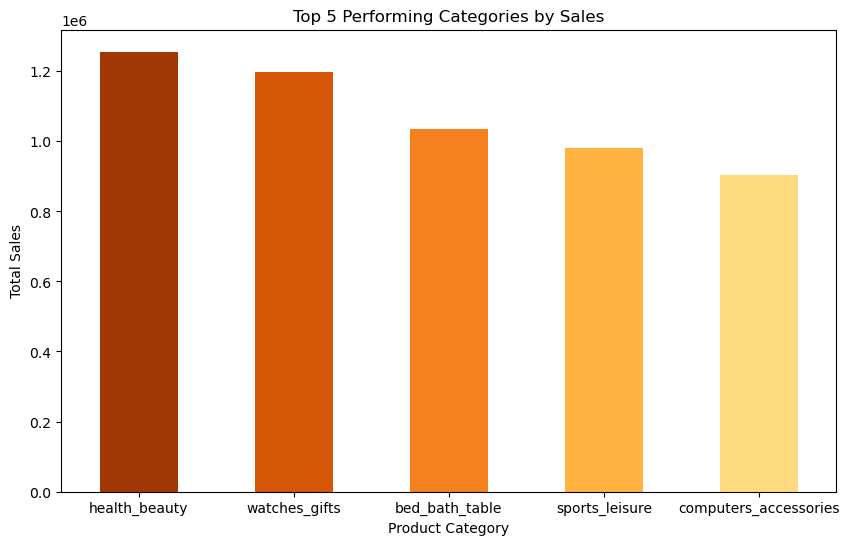

In [67]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar chart
sales_performers['total_sales'].head(5).plot(kind='bar', color = sb.color_palette("YlOrBr_r"))

# Set the title and labels
plt.title('Top 5 Performing Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### Sales Volume
is calculated by taking the aggregated order quantity, grouped by the product category.
We will then evaluate based on the top 5 Product Categories with highest sales volume.

In [23]:
# Group by product category and calculate the sales volume
volume_performance = LoMoDF.groupby('product_category_name_english').agg({
    'order_id': 'count',
}).rename(columns={
    'order_id': 'order_quantity',
})

volume_performance = volume_performance.sort_values('order_quantity',ascending = False)
volume_performance.head(5)

,order_quantity
product_category_name_english,
bed_bath_table,11097
health_beauty,9634
sports_leisure,8590
furniture_decor,8298
computers_accessories,7781


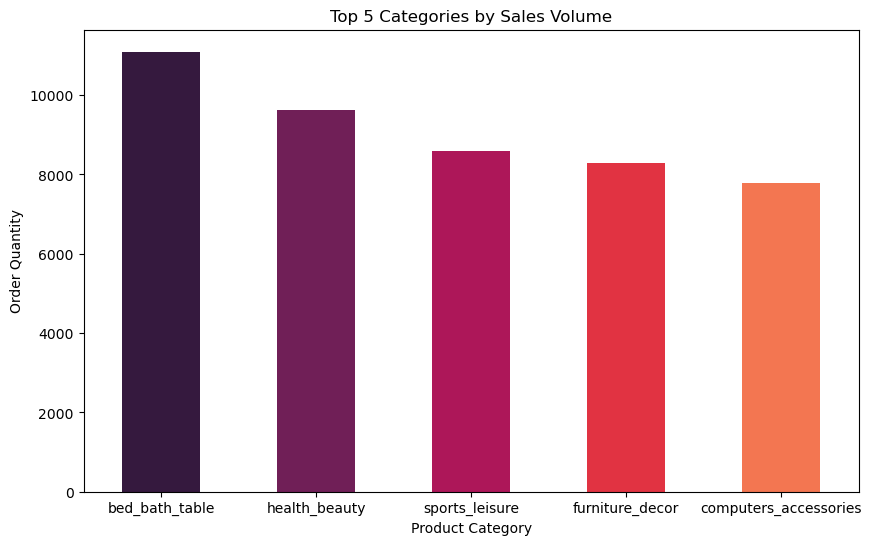

In [70]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar chart
volume_performance['order_quantity'].head(5).plot(kind='bar', color=sb.color_palette("rocket"))

# Set the title and labels
plt.title('Top 5 Categories by Sales Volume')
plt.xlabel('Product Category')
plt.ylabel('Order Quantity')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### Review Score
is calculated by taking the aggregated review score, grouped by the product category.
We will then evaluate based on the top 5 Product Categories with highest review score.

In [25]:
# Group by product category and calculate the average review score
review_score_cat = LoMoDF.groupby('product_category_name_english').agg({
    'review_score': 'mean',
}).rename(columns={
    'review_score': 'avg_review_score',
})

review_score_cat = review_score_cat.sort_values('avg_review_score',ascending = False).round(2)
review_score_cat

,avg_review_score
product_category_name_english,
cds_dvds_musicals,4.64
fashion_children_clothes,4.50
books_general_interest,4.48
books_imported,4.40
construction_tools_tools,4.36
...,...
office_furniture,3.48
portable_kitchen_and_food_preparation,3.43
home_comfort_2,3.37


### Performance Evaluation
based on sales revenue, sales volume and average review score, we can obtain a overview table with the 3 metrics.

In [26]:
# Create ranks for sales and volume performance
sales_performance['sales_rank'] = sales_performance['total_sales'].rank(ascending=False)
volume_performance['volume_rank'] = volume_performance['order_quantity'].rank(ascending=False)

# Merge the DataFrames
performance_df = sales_performance.merge(volume_performance, left_index=True, right_index=True)
performance_df = performance_df.merge(review_score_cat, left_index=True, right_index=True)

# Selecting relevant columns and rename
performance_df = performance_df[['total_sales', 'sales_rank', 'order_quantity', 
                                 'volume_rank', 'avg_review_score']].reset_index()
performance_df.rename(columns={'index': 'category'}, inplace=True)
performance_df['average_revenue_per_order'] = (performance_df['total_sales']/performance_df['order_quantity']).round(2)

# Display the DataFrame
performance_df.sort_values('sales_rank').head(10)

,product_category_name_english,total_sales,sales_rank,order_quantity,volume_rank,avg_review_score,average_revenue_per_order
43,health_beauty,1255695.13,1.0,9634,2.0,4.13,130.34
72,watches_gifts,1198185.21,2.0,5970,7.0,4.01,200.70
7,bed_bath_table,1035964.06,3.0,11097,1.0,3.88,93.36
66,sports_leisure,979740.92,4.0,8590,3.0,4.11,114.06
14,computers_accessories,904322.02,5.0,7781,5.0,3.94,116.22
39,furniture_decor,727465.05,6.0,8298,4.0,3.90,87.67
49,housewares,626825.80,7.0,6915,6.0,4.06,90.65
21,cool_stuff,620835.39,8.0,3780,12.0,4.14,164.24
5,auto,586620.73,9.0,4205,10.0,4.05,139.51
42,garden_tools,481009.94,10.0,4328,9.0,4.04,111.14


In [27]:
# Saving the DF into a CSV.
LoMoDF.to_csv('lomo_key_info.csv', index = False)

In [76]:
performance_df.sort_values('avg_review_score', ascending=False)

,product_category_name_english,total_sales,sales_rank,order_quantity,volume_rank,avg_review_score,average_revenue_per_order
11,cds_dvds_musicals,730.00,71.0,14,69.0,4.64,52.14
28,fashion_children_clothes,569.85,72.0,8,71.5,4.50,71.23
8,books_general_interest,45622.29,37.0,546,27.0,4.48,83.56
9,books_imported,4639.85,58.0,60,58.0,4.40,77.33
20,construction_tools_tools,15903.95,50.0,103,53.0,4.36,154.41
...,...,...,...,...,...,...,...
56,office_furniture,273580.70,15.0,1690,19.0,3.48,161.88
61,portable_kitchen_and_food_preparation,3933.63,62.0,14,69.0,3.43,280.97
47,home_comfort_2,760.27,70.0,30,65.5,3.37,25.34
23,diapers_and_hygiene,1538.79,67.0,38,62.0,3.32,40.49


## Merging the other datasets for geolocation information. 
The analysis and findings from geolocation details will be presented on a dashboard.

In [28]:
geolocation_df.head()

,object_id,shape,admin0_name_en,admin0_name_th,admin0_pcode,admin1_name_en,admin1_name_th,admin1_pcode,admin2_name_en,admin2_name_th,admin2_pcode,admin3_name_en,admin3_name_th,admin3_pcode,shape_length,shape_area
0,1,Polygon,Thailand,ประเทศไทย,TH,Loei,เลย,TH42,Tha Li,ท่าลี่,TH4208,A Hi,อาฮี,TH420803,0.360041,0.005078
1,2,Polygon,Thailand,ประเทศไทย,TH,Pattani,ปัตตานี,TH94,Mueang Pattani,เมืองปัตตานี,TH9401,A Noru,อาเนาะรู,TH940102,0.044900,0.000120
2,3,Polygon,Thailand,ประเทศไทย,TH,Surin,สุรินทร์,TH32,Buachet,บัวเชด,TH3213,A Phon,อาโพน,TH321305,0.365838,0.004086
3,4,Polygon,Thailand,ประเทศไทย,TH,Yala,ยะลา,TH95,Raman,รามัน,TH9506,A Song,อาซ่อง,TH950615,0.314589,0.003177
4,5,Polygon,Thailand,ประเทศไทย,TH,Nan,น่าน,TH55,Wiang Sa,เวียงสา,TH5507,Ai Na Lai,อ่ายนาไลย,TH550711,1.102764,0.014955


### Dropping columns that are not needed.
These includes the administrative names in thai, the pcodes for admin0 to admin2, and shape details. The dashboard will only require essential informations such as the administrative names 0 to 3.

In [29]:
geolocation_df = geolocation_df.drop(['shape','admin0_name_th','admin0_pcode',
                                      'admin1_name_th','admin1_pcode','admin2_name_th','admin2_pcode',
                                      'admin3_name_th','shape_length','shape_area','object_id'], axis = 1)

geolocation_df.head()

,admin0_name_en,admin1_name_en,admin2_name_en,admin3_name_en,admin3_pcode
0,Thailand,Loei,Tha Li,A Hi,TH420803
1,Thailand,Pattani,Mueang Pattani,A Noru,TH940102
2,Thailand,Surin,Buachet,A Phon,TH321305
3,Thailand,Yala,Raman,A Song,TH950615
4,Thailand,Nan,Wiang Sa,Ai Na Lai,TH550711


### Merging the geolocation data with customer data.
This will be done by matching of the primary key 'admin3_pcode', which is the zip code prefix in customer data.

In [30]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok


In [31]:
customers_df = pd.merge(customers_df, geolocation_df, 
                        left_on='customer_zip_code_prefix', 
                        right_on='admin3_pcode', how='left')

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,admin0_name_en,admin1_name_en,admin2_name_en,admin3_name_en,admin3_pcode
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101


In [32]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,admin0_name_en,admin1_name_en,admin2_name_en,admin3_name_en,admin3_pcode
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok,Thailand,Bangkok,Phra Nakhon,Phraborom Maharatchawang,TH100101


### Duplicated columns
Noting that 'admin1_name' is the same as 'customer_state' and 'admin2_name' is the same as 'customer_city', I will drop the duplicated columns. 

I will also rename 'admin0_name_en' as 'customer_country' and 'admin3_name_en' as 'customer_district', for clearer representation.



In [33]:
# Drop the duplicated columns 'admin1_name_en' and 'admin2_name_en'
customers_df.drop(['admin1_name_en', 'admin2_name_en','admin3_pcode'], axis = 1, inplace=True)

# Rename 'admin0_name_en' to 'customer_country' and 'admin3_name_en' to 'customer_district'
customers_df.rename(columns={
    'admin0_name_en': 'customer_country',
    'admin3_name_en': 'customer_district'
}, inplace=True)

customers_df.head()  

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,customer_district
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang


In [34]:
# Saving the DF into a CSV.
customers_df.to_csv('customers_key_info.csv', index = False)

## Merging the geolocation data with seller data, closed deals and leads data.
### Geolocation data merging
This will be done by matching of the primary key 'admin3_pcode', which is the zip code prefix in seller data. 

In [35]:
sellers_df.head()

,seller_id,seller_zip_code_prefix_prep,seller_city_prep,seller_state_prep,seller_zip_code_prefix,seller_city,seller_state
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok,TH100101,Phra Nakhon,Bangkok
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok,TH100101,Phra Nakhon,Bangkok
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok


In [36]:
# Removing duplicate prep columns
sellers_df = sellers_df.drop(['seller_zip_code_prefix_prep','seller_city_prep',
                              'seller_state_prep'], axis = 1)

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok


In [39]:
# Merging with geolocation data to include district and country
sellers_merge = pd.merge(
    sellers_df,
    geolocation_df[['admin3_pcode', 'admin0_name_en', 'admin3_name_en']],
    left_on='seller_zip_code_prefix',
    right_on='admin3_pcode', how='left)

# Drop the 'admin3_pcode' as it is a duplicate of 'customer_zip_code_prefix'
sellers_merge.drop(columns=['admin3_pcode'], inplace=True)

# Rename 'admin0_name_en' to 'customer_country' and 'admin3_name_en' to 'customer_district'
sellers_merge.rename(
    columns={
        'admin0_name_en': 'seller_country',
        'admin3_name_en': 'seller_district'
    },inplace=True)

sellers_merge.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_country,seller_district
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom


In [40]:
dfsummary(sellers_merge)

Dataset Shape: (3095, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,seller_id,object,0,3095,c2bda99904207edd1834f03e0022b007,788e857f317e53de488d393e65a80f45,713e3a23ca5e47786eb6f0d99f94cfac,11.60
1,seller_zip_code_prefix,object,0,2014,TH100101,TH100101,TH100102,10.74
2,seller_city,object,0,382,Phra Nakhon,Phra Nakhon,Phra Nakhon,8.17
3,seller_state,object,0,40,Bangkok,Bangkok,Bangkok,5.10
4,seller_country,object,0,1,Thailand,Thailand,Thailand,0.00
5,seller_district,object,0,1759,Phraborom Maharatchawang,Phraborom Maharatchawang,Wang Burapha Phirom,10.46


### Merging of closed deals and MQL data.
this is done by the matching of primary key mql_id.

In [42]:
# Merge the 2 dfs
closed_deals_leads_df = pd.merge(closed_deals_df,
                                 marketing_qualified_leads_df[['mql_id','first_contact_date','origin']],
                                 on= 'mql_id', how = 'left')

closed_deals_leads_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,average_stock,business_type_org,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,26/02/2018 19:58,pet,online_medium,captain_america,False,above 100,reseller,400,"3,000",21/02/2018,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,08/05/2018 20:17,car_accessories,industry,hawkeye,True,above 100,reseller,600,"6,000",04/04/2018,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,05/06/2018 17:27,home_appliances,online_big,captain_america,False,above 100,reseller,700,"4,000",03/04/2018,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,17/01/2018 13:51,food_drink,online_small,scarlet_witch,True,above 100,reseller,700,"2,000",14/01/2018,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,03/07/2018 20:17,home_appliances,industry,iron_man,False,below 100,manufacturer,300,"3,000",09/10/2017,unknown


In [44]:
# Drop the columns not needed
closed_deals_leads_df = closed_deals_leads_df.drop(['sdr_id','sr_id'], axis=1)

### Merging of closed deals with leads and seller data.
this is done by the matching of primary key seller_id.

In [47]:
seller_key_info = pd.merge(sellers_merge,
                           closed_deals_leads_df,
                           on= 'seller_id',
                           how= 'left')
seller_key_info.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_country,seller_district,mql_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,average_stock,business_type_org,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,origin
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang,c14a716bc18a0f87296c2ec10bfe8929,05/04/2018 14:44,bags_backpacks,online_medium,iron_man,True,above 100,manufacturer,600,"8,000",03/04/2018,organic_search
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Saving the DF into a CSV.
seller_key_info.to_csv('sellers_key_info.csv', index = False)

In [50]:
LoMoDF

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,13/09/2017 08:59,13/09/2017 09:45,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26/04/2017 10:53,26/04/2017 11:05,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,14/01/2018 14:33,14/01/2018 14:48,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,08/08/2018 10:00,08/08/2018 10:10,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,04/02/2017 13:57,04/02/2017 14:10,16/02/2017 09:46,01/03/2017 16:42,17/03/2017 00:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110513,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,02/05/2018 04:11,299.99,43.41,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,23/04/2018 13:57,25/04/2018 04:11,25/04/2018 12:09,10/05/2018 22:56,18/05/2018 00:00,5.0
110514,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/07/2018 04:31,350.00,36.53,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,14/07/2018 10:26,17/07/2018 04:31,17/07/2018 08:05,23/07/2018 20:31,01/08/2018 00:00,5.0
110515,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.90,16.95,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,23/10/2017 17:07,24/10/2017 17:14,26/10/2017 15:13,28/10/2017 12:22,10/11/2017 00:00,5.0
110516,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/08/2017 00:04,55.99,8.72,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,14/08/2017 23:02,15/08/2017 00:04,15/08/2017 19:02,16/08/2017 21:59,25/08/2017 00:00,5.0


In [54]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,customer_district
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
...,...,...,...,...,...,...,...
99436,1dbe0bf136ea8849ed9648546ebc2e63,bd0d97c6af77a1ef4850255bd6d17fec,TH960905,Sukhirin,Narathiwat,Thailand,Rom Sai
99437,f4bc36ec33804416487b2a7051214db6,e613f7834ff4bd901915744d6b7a1a83,TH960905,Sukhirin,Narathiwat,Thailand,Rom Sai
99438,88c36fbd3df96094f90f0315e1d2dd90,e629cd3ff381ad0a234016fa7dd76f46,TH960905,Sukhirin,Narathiwat,Thailand,Rom Sai
99439,a01fcde31529708c8755a0226631c0d7,f34fd449c1a6da5fbf276eada6a5fba2,TH960905,Sukhirin,Narathiwat,Thailand,Rom Sai


In [56]:
best_selling_df = pd.merge(LoMoDF, customers_df,
                           on='customer_id', how='left')

best_selling_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,customer_district
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00,5.0,871766c5855e863f6eccc05f988b23cb,TH350805,Loeng Nok Tha,Yasothon,Thailand,Hong Saeng
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00,4.0,eb28e67c4c0b83846050ddfb8a35d051,TH350802,Loeng Nok Tha,Yasothon,Thailand,Bung Kha
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00,5.0,3818d81c6709e39d06b2738a8d3a2474,TH190210,Kaeng Khoi,Saraburi,Thailand,Cha-Om
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00,4.0,af861d436cfc08b2c2ddefd0ba074622,TH320904,Sikhoraphum,Surin,Thailand,Yang
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,16/02/2017 09:46,01/03/2017 16:42,17/03/2017 00:00,5.0,64b576fb70d441e8f1b2d7d446e483c5,TH810303,Ko Lanta,Krabi,Thailand,Ko Klang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110513,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,02/05/2018 04:11,299.99,43.41,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,25/04/2018 12:09,10/05/2018 22:56,18/05/2018 00:00,5.0,0c9aeda10a71f369396d0c04dce13a64,TH470401,Phanna Nikhom,Sakon Nakhon,Thailand,Phanna
110514,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/07/2018 04:31,350.00,36.53,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,17/07/2018 08:05,23/07/2018 20:31,01/08/2018 00:00,5.0,0da9fe112eae0c74d3ba1fe16de0988b,TH380401,Seka,Bueng Kan,Thailand,Seka
110515,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.90,16.95,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,26/10/2017 15:13,28/10/2017 12:22,10/11/2017 00:00,5.0,cd79b407828f02fdbba457111c38e4c4,TH620301,Khlong Lan,Kamphaeng Phet,Thailand,Khlong Nam Lai
110516,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/08/2017 00:04,55.99,8.72,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,15/08/2017 19:02,16/08/2017 21:59,25/08/2017 00:00,5.0,eb803377c9315b564bdedad672039306,TH361009,Phu Khiao,Chaiyaphum,Thailand,O Lo


In [57]:
# Count the number of unique orders for each product category within each customer state
order_counts = best_selling_df.groupby(['customer_state', 'product_category_name_english'])['order_id'].nunique().reset_index(name='order_count')

# Determine the best-selling category for each state by finding the category with the highest order count
best_selling_categories = order_counts.loc[order_counts.groupby('customer_state')['order_count'].idxmax()]

# Selecting only the relevant columns for the final output
best_selling_categories = best_selling_categories[['customer_state', 'product_category_name_english', 'order_count']]
best_selling_categories.reset_index(drop=True, inplace=True)

best_selling_categories


,customer_state,product_category_name_english,order_count
0,Amnat Charoen,health_beauty,183
1,Ang Thong,computers_accessories,19
2,Bangkok,bed_bath_table,46
3,Bueng Kan,bed_bath_table,179
4,Buri Ram,bed_bath_table,329
...,...,...,...
64,Udon Thani,bed_bath_table,39
65,Uthai Thani,health_beauty,93
66,Uttaradit,health_beauty,67
67,Yala,health_beauty,12


In [58]:
# Saving the DF into a CSV.
best_selling_categories.to_csv('best_selling_categories.csv', index = False)